In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from corner import corner
from acor import acor

from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
#rundir = '/home/pbaker/nanograv/bwm/dropout/'
rundir = '/home/pbaker/nanograv/bwm/dropout_11/'

with open(rundir + 'params.txt', 'r') as f:
    params = [line.rstrip('\n') for line in f]
    
# get just bwm params
idx_A = params.index('bwm_log10_A')

idx_k = []
par_k = []
for par in params:
    if "psrk" in par:
        idx_k.append(params.index(par))
        par_k.append(par)

In [32]:
chain_raw = pd.read_csv(rundir + 'chain_1.txt',
                        sep='\t', dtype=float, header=None).values
print(len(chain_raw))

43660


In [33]:
thin = 3
burn = int(0.15 * len(chain_raw))

chain = chain_raw[burn::thin, :-4]
ch_L = chain_raw[burn::thin, -4]

ch_A = chain[:, idx_A]

N = 12371, corrL = 6.649765413630824


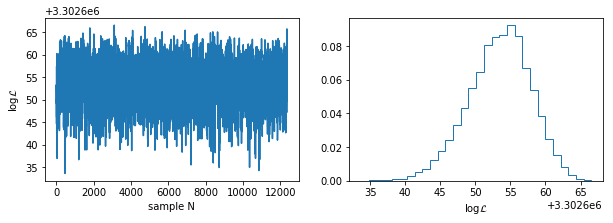

In [34]:
corr = acor(ch_L)[0]
N = len(ch_L)
print("N = {}, corrL = {}".format(N, corr))

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(121)
ax1.plot(ch_L)
ax1.set_ylabel(r'$\log\mathcal{L}$')
ax1.set_xlabel('sample N')

ax2 = fig.add_subplot(122)
ax2.hist(ch_L, bins=30, density=True, histtype='step')
ax2.set_xlabel(r'$\log\mathcal{L}$');

corrA = 4.624144614953251


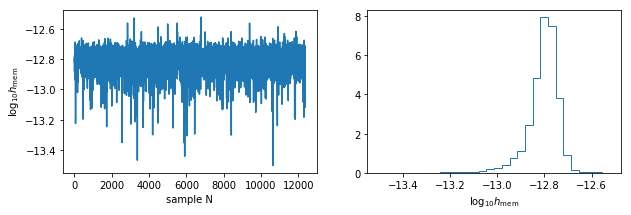

In [35]:
corr = acor(ch_A)[0]
print("corrA = {}".format(corr))

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(121)
ax1.plot(ch_A)
ax1.set_ylabel(r'$\log_{10} h_\mathrm{mem}$')
ax1.set_xlabel('sample N')

ax2 = fig.add_subplot(122)
ax2.hist(ch_A, bins=30, density=True, histtype='step')
ax2.set_xlabel(r'$\log_{10} h_\mathrm{mem}$');

In [36]:
mybins = np.linspace(0, 1, 25)

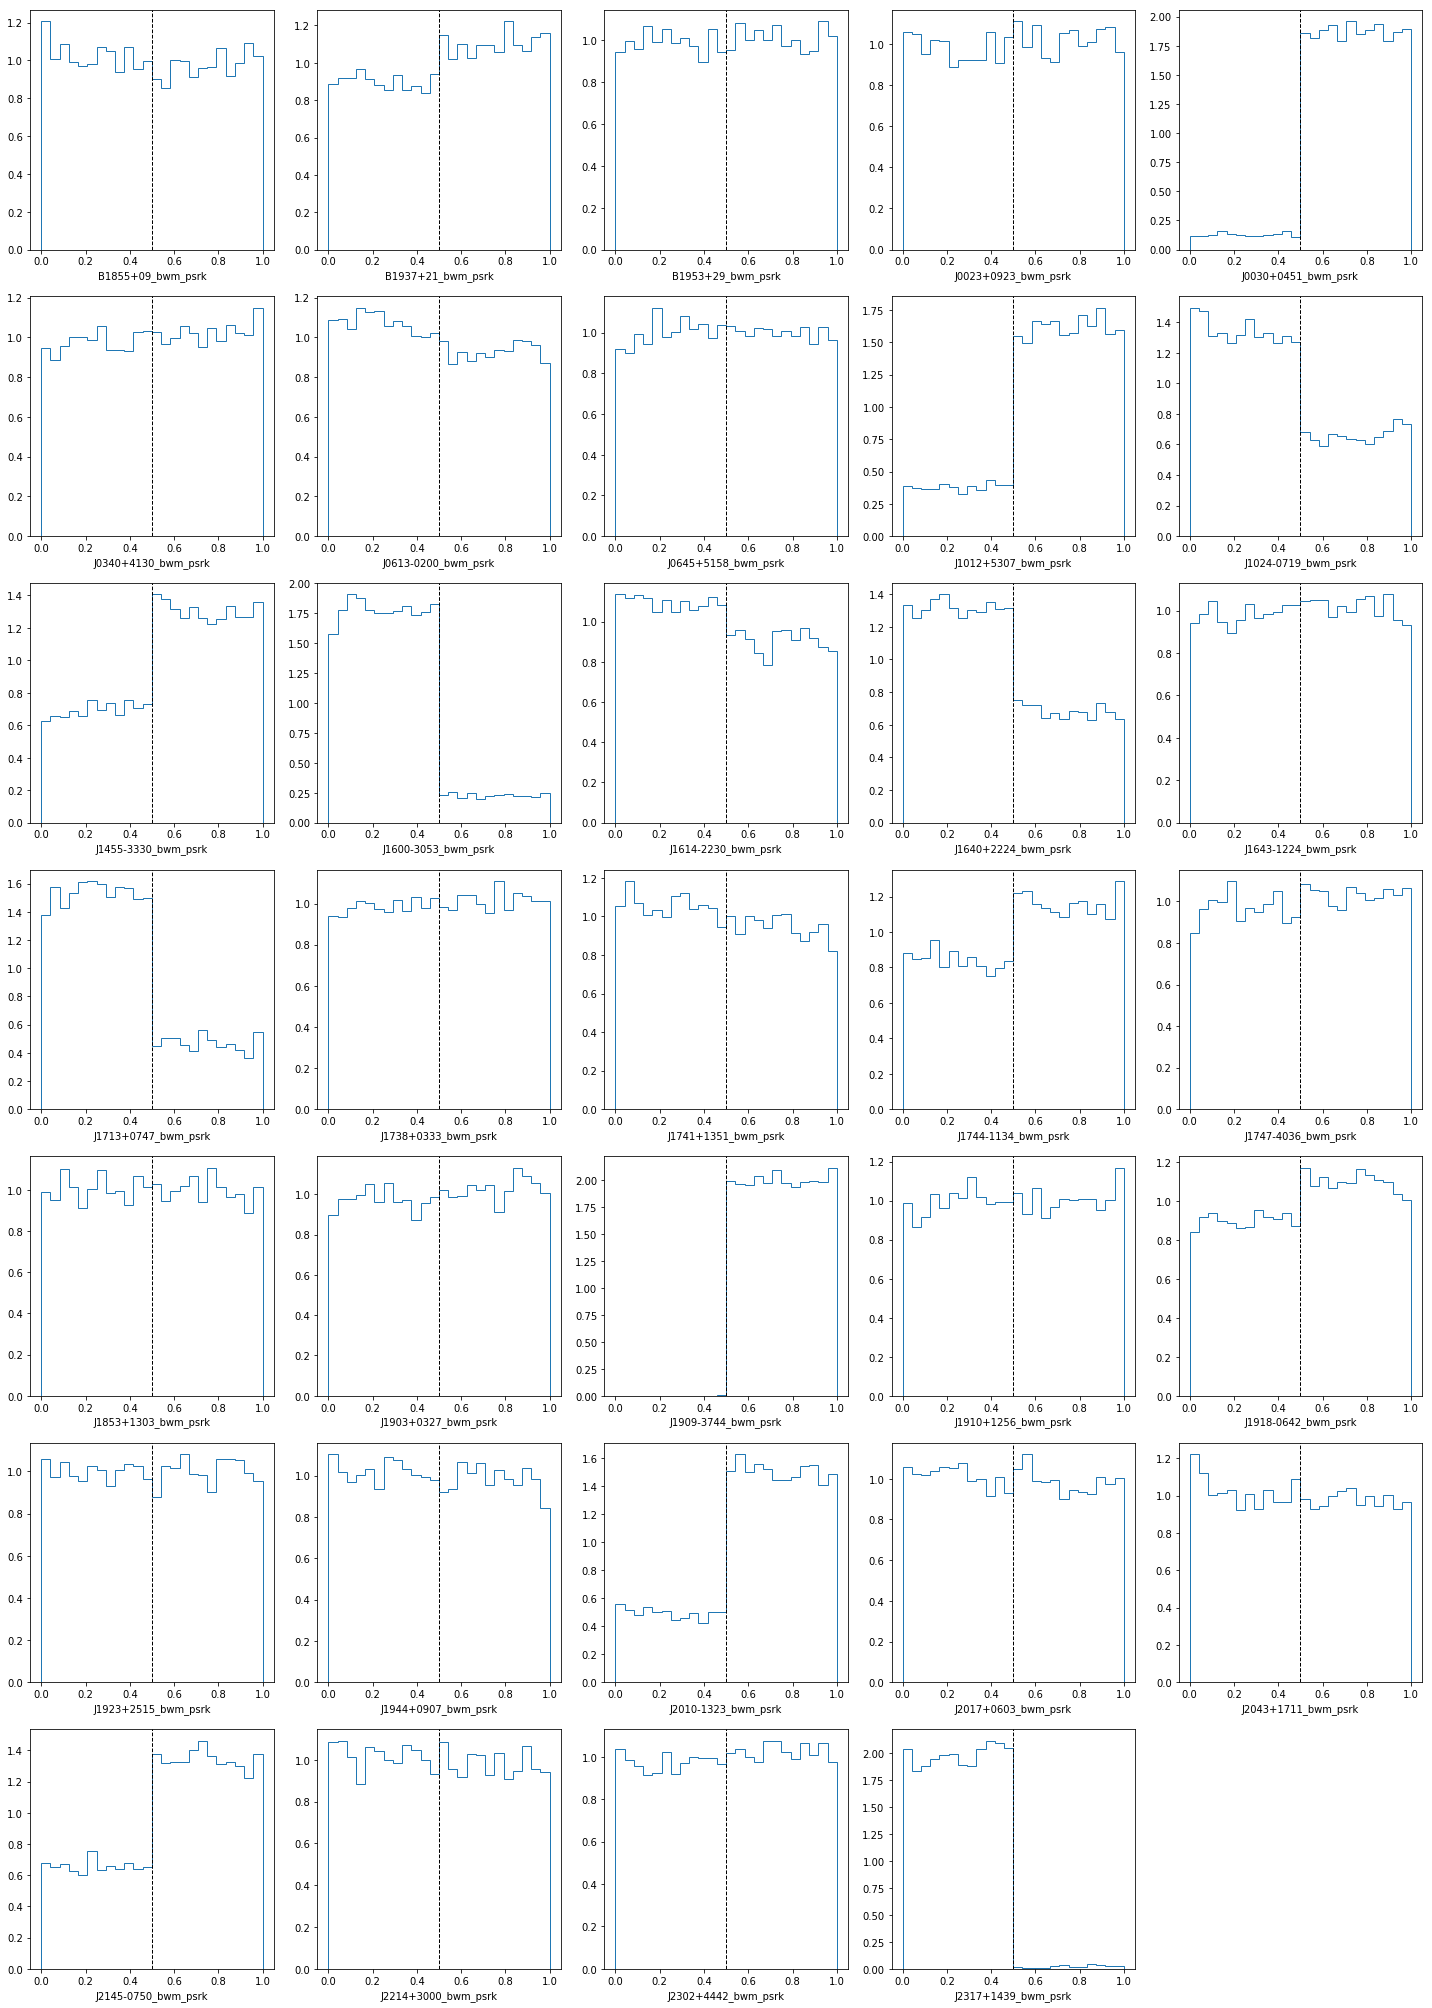

In [42]:
Ncols = 5
Nrows = len(par_k)//Ncols
if Nrows*Ncols < len(par_k):
    Nrows += 1
ax = []
fig = plt.figure(figsize=(20,4*Nrows))

for pp, par in enumerate(par_k):
    ax.append(fig.add_subplot(Nrows,Ncols,pp+1))
    ax[pp].hist(chain[:,idx_k[pp]], bins=mybins, density=True, histtype='step') #, label='')
    ax[pp].axvline(x=0.5, color='k', ls='--', lw=1)
    ax[pp].set_xlabel(par)
    #ax[pp].set_yscale('log')
plt.tight_layout()

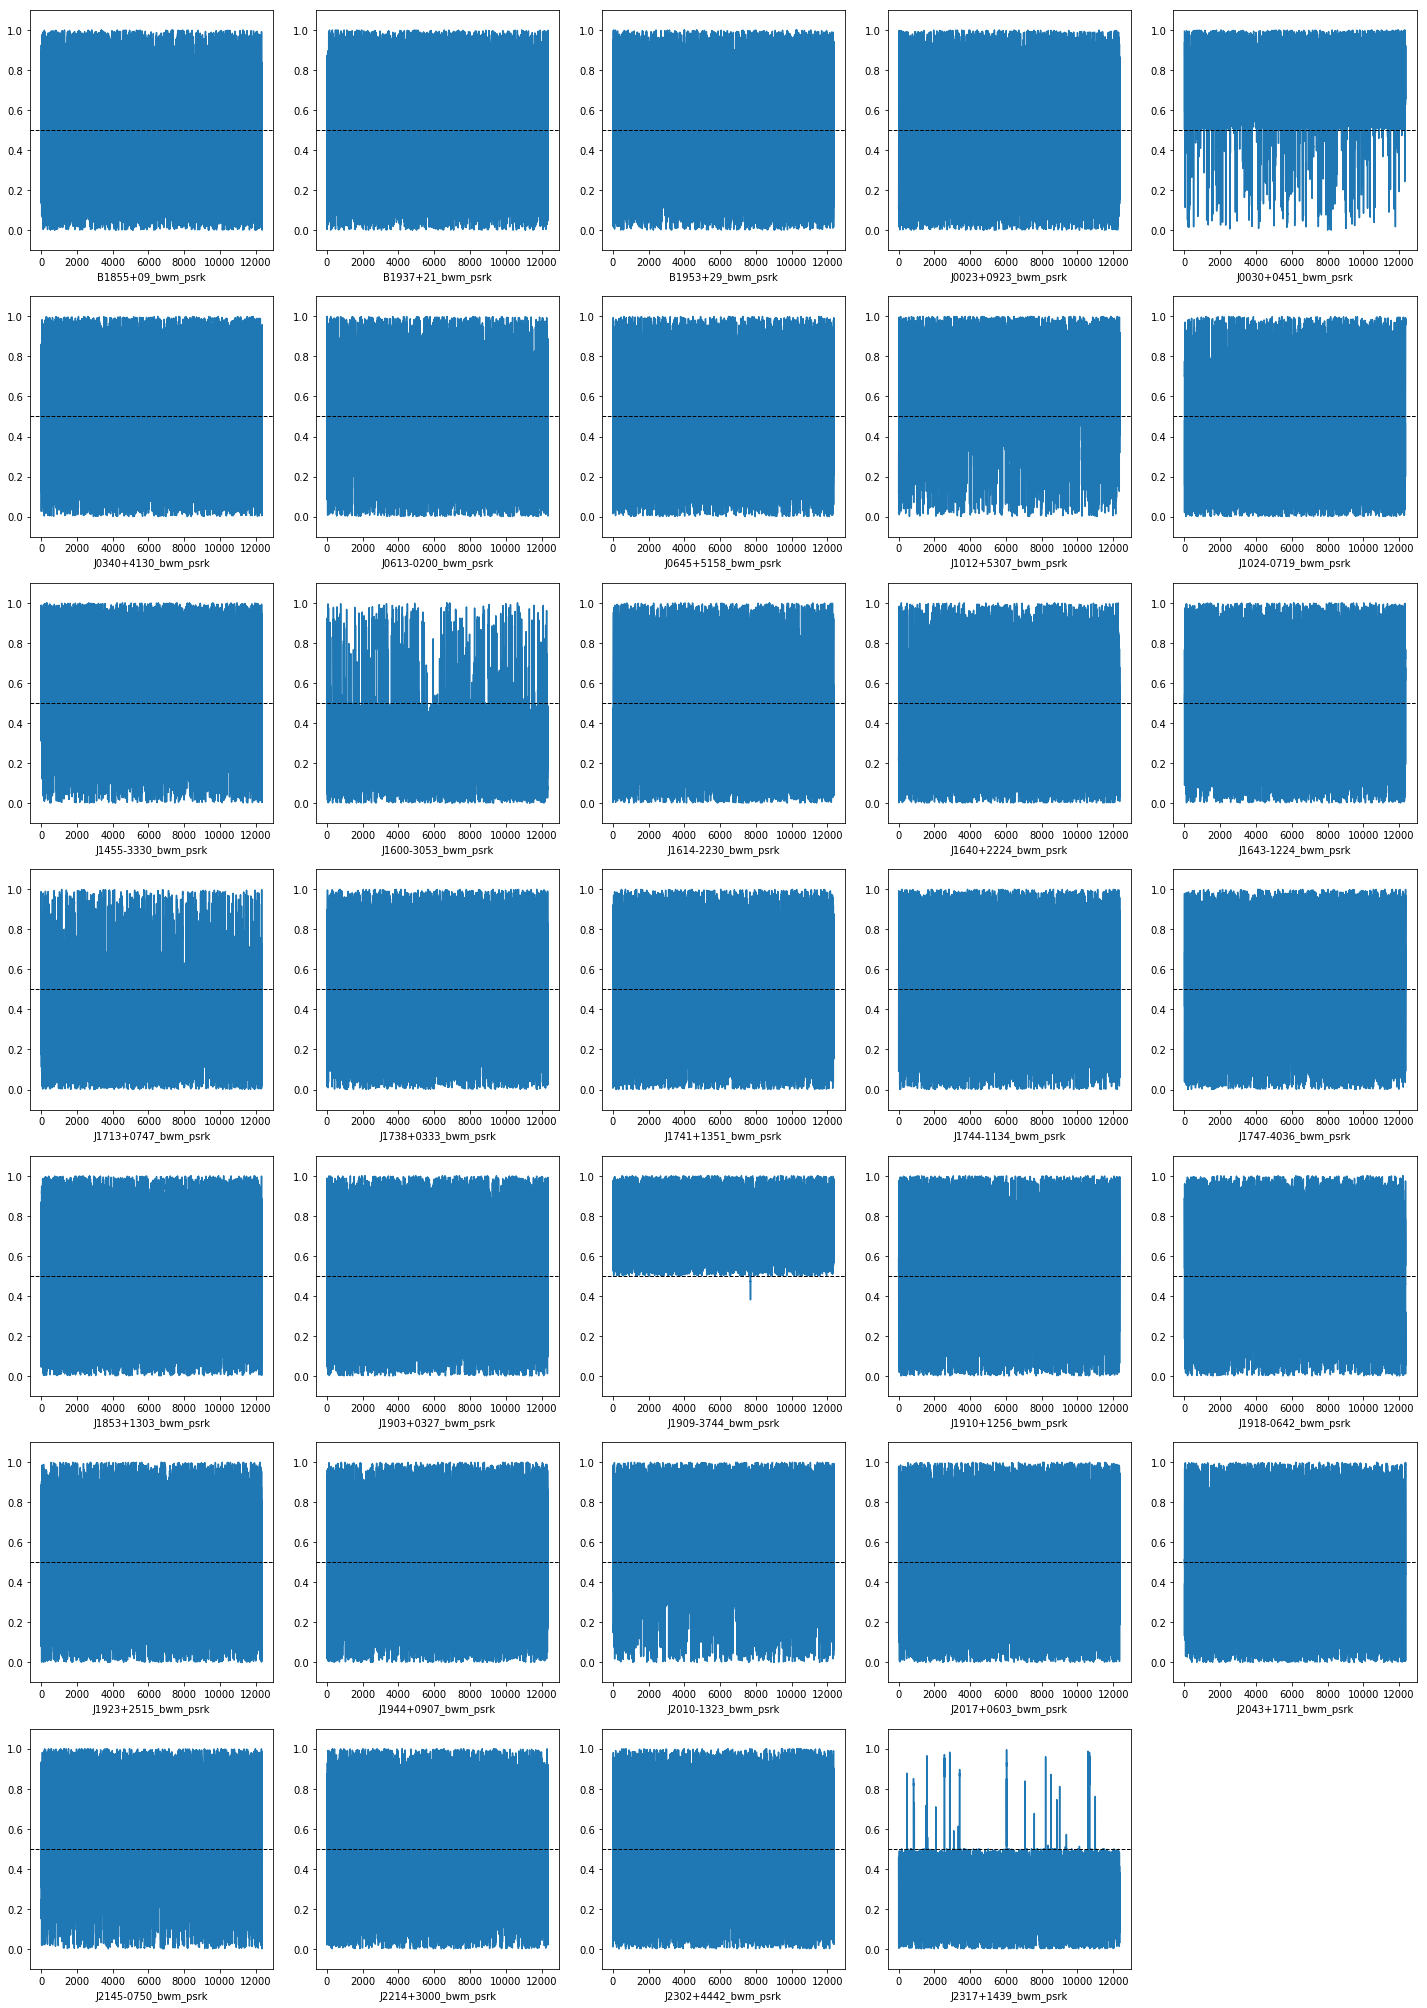

In [43]:
Ncols = 5
Nrows = len(par_k)//Ncols
if Nrows*Ncols < len(par_k):
    Nrows += 1
ax = []
fig = plt.figure(figsize=(20,4*Nrows))

for pp, par in enumerate(par_k):
    ax.append(fig.add_subplot(Nrows,Ncols,pp+1))
    ax[pp].plot(chain[:,idx_k[pp]])
    ax[pp].axhline(y=0.5, color='k', ls='--', lw=1)
    ax[pp].set_ylim([-0.1,1.1])
    ax[pp].set_xlabel(par)
plt.tight_layout()

In [37]:
dropout_dict = {}
Os = []
psrnames = []
for p, par in enumerate(par_k):
    on = sum(np.rint(chain[:,idx_k[p]]))/len(chain)
    off = 1 - on
    odds = on/off
    if np.isinf(odds):
        odds = N
    psrname = par.split('_')[0]
    psrnames.append(psrname)
    Os.append(odds)
    if psrname[0]=='B':
        psrname = '  '+psrname
    print("{:s} on frac = {:.2f}, Odds = {:.2f}".format(psrname, on, odds))
    dropout_dict[psrname] = odds

Os = np.array(Os)
psrnames = np.array(psrnames)
idx = np.argsort(Os)

  B1855+09 on frac = 0.49, Odds = 0.95
  B1937+21 on frac = 0.55, Odds = 1.23
  B1953+29 on frac = 0.51, Odds = 1.02
J0023+0923 on frac = 0.51, Odds = 1.04
J0030+0451 on frac = 0.94, Odds = 14.66
J0340+4130 on frac = 0.51, Odds = 1.05
J0613-0200 on frac = 0.46, Odds = 0.87
J0645+5158 on frac = 0.50, Odds = 1.00
J1012+5307 on frac = 0.81, Odds = 4.23
J1024-0719 on frac = 0.33, Odds = 0.49
J1455-3330 on frac = 0.65, Odds = 1.88
J1600-3053 on frac = 0.11, Odds = 0.13
J1614-2230 on frac = 0.45, Odds = 0.83
J1640+2224 on frac = 0.34, Odds = 0.52
J1643-1224 on frac = 0.51, Odds = 1.03
J1713+0747 on frac = 0.23, Odds = 0.31
J1738+0333 on frac = 0.51, Odds = 1.03
J1741+1351 on frac = 0.47, Odds = 0.90
J1744-1134 on frac = 0.58, Odds = 1.38
J1747-4036 on frac = 0.52, Odds = 1.07
J1853+1303 on frac = 0.50, Odds = 0.99
J1903+0327 on frac = 0.51, Odds = 1.06
J1909-3744 on frac = 1.00, Odds = 2060.83
J1910+1256 on frac = 0.50, Odds = 1.01
J1918-0642 on frac = 0.55, Odds = 1.22
J1923+2515 on frac = 

In [38]:
with open(rundir+"dropout.json", 'w') as fout:
    json.dump(dropout_dict, fout)

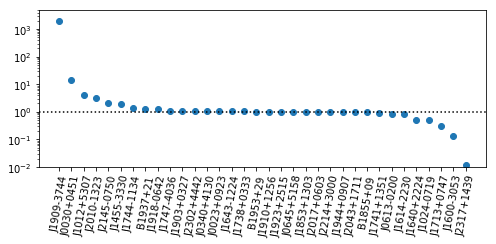

In [39]:
xs = np.arange(len(Os))
fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

ax.plot(xs, Os[idx[::-1]], linestyle='none', marker='o')
ax.axhline(y=1, color='k', ls=':')
#ax.axhline(y=5, color='k', ls=':')
#ax.axhline(y=1/5, color='k', ls=':')
ax.set_xticks(xs)
ax.set_xticklabels(psrnames[idx[::-1]], rotation=80)#, fontsize=11)
ax.set_ylim([1/100, 5000])
ax.set_yscale('log')

plt.tight_layout()
#plt.savefig("/home/pbaker/dropout.pdf")

In [40]:
sig_psrs = ['J0030+0451', 'J1909-3744', 'J1600-3053', 'J1614-2230', 'J2317+1439', 'J1713+0747']

par_sig = []
idx_sig = []
for psr in sig_psrs:
    for par in params:
        if psr in par and "_psrk" in par:
            idx_sig.append(params.index(par))
            par_sig.append(par)

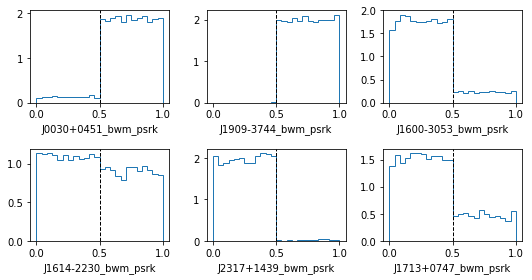

In [41]:
ax = []
fig = plt.figure(figsize=(7.5,4))

for pp, par in enumerate(par_sig):
    ax.append(fig.add_subplot(2,3,pp+1))
    ax[pp].hist(chain[:,idx_sig[pp]], bins=mybins, density=True, histtype='step') #, label='')
    ax[pp].axvline(x=0.5, color='k', ls='--', lw=1)
    ax[pp].set_xlabel(par)
    #ax[pp].set_yscale('log')
plt.tight_layout()

# make the plot with both 9yr and 11yr points (9yr PSRs only)

In [44]:
with open('/home/pbaker/nanograv/bwm/dropout/dropout.json') as fin:
    drop_9 = json.load(fin)

with open('/home/pbaker/nanograv/bwm/dropout_11/dropout.json') as fin:
    drop_11 = json.load(fin)

In [45]:
psrkeys = np.array(list(drop_9.keys()))
Os_9 = np.array(list(drop_9.values()))
Os_11 = np.array([drop_11[key] for key in psrkeys])

In [46]:
psrnames = np.array([
    'B1855$+$09',
    'J0030$+$0451',
    'J0613$-$0200',
    'J1012$+$5307',
    'J1024$-$0719',
    'J1455$-$3330',
    'J1600$-$3053',
    'J1614$-$2230',
    'J1640$+$2224',
    'J1713$+$0747',
    'J1741$+$1351',
    'J1744$-$1134',
    'J1853$+$1303',
    'J1909$-$3744',
    'J1918$-$0642',
    'J2010$-$1323',
    'J2145$-$0750',
    'J2317$+$1439'
])

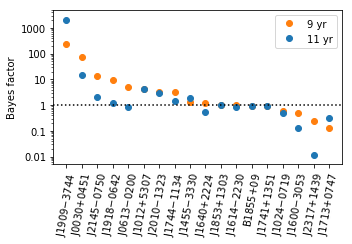

In [48]:
idx = np.argsort(Os_9)
xs = np.arange(len(Os_9))
fig = plt.figure(figsize=(5,3.5))
ax = fig.add_subplot(111)

ax.plot(xs, Os_9[idx[::-1]], linestyle='none', marker='o', color='C1', label='9 yr')
ax.plot(xs, Os_11[idx[::-1]], linestyle='none', marker='o', color='C0', label='11 yr')
ax.axhline(y=1, color='k', ls=':')
ax.set_xticks(xs)
ax.set_xticklabels(psrnames[idx[::-1]], rotation=80)
ax.set_ylim([1/200, 5000])
ax.set_yscale('log')
ax.set_ylabel('Bayes factor')
plt.yticks([0.01, 0.1, 1, 10, 100, 1000], ["0.01", "0.1", "1", "10", "100", "1000"])

ax.legend(loc=0)

plt.tight_layout()
plt.savefig("/home/pbaker/dropout.pdf")